In [2]:
import numpy as np

In [3]:
import pandas as pd

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
tip=sns.load_dataset("tips")

In [20]:
print(type(tip))

<class 'pandas.core.frame.DataFrame'>


In [21]:
print(tip.shape)

(244, 7)


In [22]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [23]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
tip.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2



    Analysis of tips given by different genders
    maximum footfall on which day
 


In [34]:
gender_tips = tip.groupby("sex")["tip"].mean()


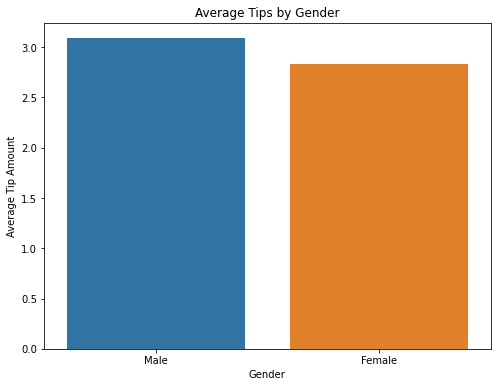

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_tips.index, y=gender_tips.values)
plt.title("Average Tips by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Tip Amount")
plt.show()

In [37]:
# Counting footfall by day
footfall_by_day = tip['day'].value_counts()

# Finding the day with maximum footfall
max_footfall_day = footfall_by_day.idxmax()

print("Day with the maximum footfall:", max_footfall_day)


Day with the maximum footfall: Sat


Do people that have higher bills pay more tips.

In [45]:
filtered_dataset = tip[tip['tip'] > tip['total_bill']]
print(filtered_dataset)

Empty DataFrame
Columns: [total_bill, tip, sex, smoker, day, time, size]
Index: []


frequency of people visiting on weekend

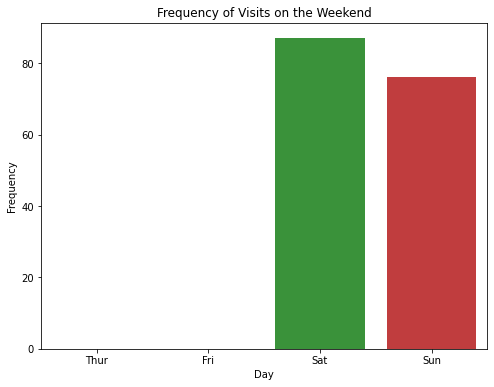

In [47]:
weekend_visits = tip[tip['day'].isin(['Sat', 'Sun'])]

# Calculate the frequency of visits on the weekend
weekend_frequency = weekend_visits.shape[0]

# Create a bar plot to visualize the frequency of visits on the weekend
plt.figure(figsize=(8, 6))
sns.countplot(x='day', data=weekend_visits)
plt.title("Frequency of Visits on the Weekend")
plt.xlabel("Day")
plt.ylabel("Frequency")
plt.show()


Analysis of total bill/money spend and tips by various family sizes

In [54]:
tip['total_money'] = tip['total_bill'] + tip['tip']

# Select the columns for analysis
columns = ['size', 'total_bill', 'tip', 'total_money']

# Create a new DataFrame with the selected columns
analysis_table = tip[columns]

# Print the analysis table
print(analysis_table)


     size  total_bill   tip  total_money
0       2       16.99  1.01        18.00
1       3       10.34  1.66        12.00
2       3       21.01  3.50        24.51
3       2       23.68  3.31        26.99
4       4       24.59  3.61        28.20
..    ...         ...   ...          ...
239     3       29.03  5.92        34.95
240     2       27.18  2.00        29.18
241     2       22.67  2.00        24.67
242     2       17.82  1.75        19.57
243     2       18.78  3.00        21.78

[244 rows x 4 columns]


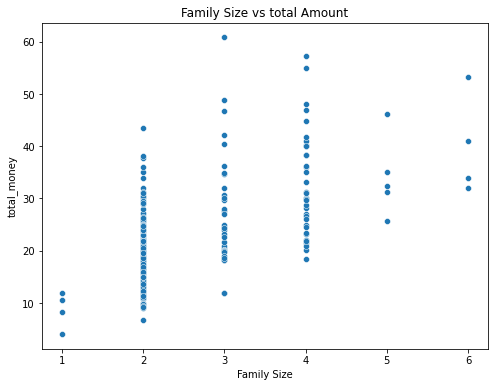

In [52]:
tip['total_money'] = tip['total_bill'] + tip['tip']
plt.figure(figsize=(8, 6))
sns.scatterplot(x="size", y="total_money", data=tip)
plt.title("Family Size vs total Amount")
plt.xlabel("Family Size")
plt.ylabel("total_money")
plt.show()

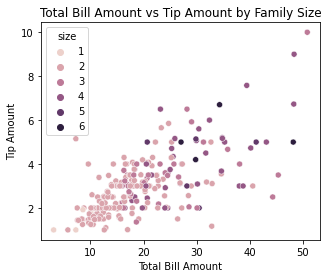

In [81]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x="total_bill", y="tip", hue="size", data=tip)
plt.title("Total Bill Amount vs Tip Amount by Family Size")
plt.xlabel("Total Bill Amount")
plt.ylabel("Tip Amount")
plt.show()

frequency of people coming for dinner or lunch

In [57]:
dinner_frequency = tip[tip['time'] == 'Dinner'].shape[0]
lunch_frequency = tip[tip['time'] == 'Lunch'].shape[0]

# Print the frequencies
print("Frequency of people coming for dinner:", dinner_frequency)
print("Frequency of people coming for lunch:", lunch_frequency)

Frequency of people coming for dinner: 176
Frequency of people coming for lunch: 68


busiest time

In [58]:
if dinner_frequency>lunch_frequency:
    print("dinner time is busiest")
else:
    print("lunch time is busiest")

dinner time is busiest


ananlysis on busiest time with majority(smoker or non smoker)

In [59]:
# Group the data by time and smoker status and calculate the count
smoker_count = tip.groupby(['time', 'smoker']).size().unstack()

# Determine the busiest time based on majority of smokers or non-smokers
busiest_time = 'Dinner' if smoker_count['Yes']['Dinner'] > smoker_count['No']['Dinner'] else 'Lunch'

# Print the analysis result
print("Busiest time with majority of", busiest_time)


Busiest time with majority of Lunch


Which day of the week is the busiest

In [60]:
tip['day'] = pd.Categorical(tip['day'], categories=['Mon','Tue','Wed','Thur', 'Fri', 'Sat', 'Sun'], ordered=True)

# Calculate the frequency of visits for each day
day_frequency = tip['day'].value_counts()

# Determine the busiest day
busiest_day = day_frequency.idxmax()

# Print the result
print("Busiest day of the week:", busiest_day)


Busiest day of the week: Sat


bill to tip ratio

In [62]:
tip['bill_to_tip_ratio'] = tip['tip'] / tip['total_bill']

# Print the dataset with the added ratio column
print(tip[['total_bill', 'tip', 'bill_to_tip_ratio']])

average_tip_to_bill_ratio = tip['bill_to_tip_ratio'].mean()
print("Average tip to bill ratio:", average_tip_to_bill_ratio)

     total_bill   tip  bill_to_tip_ratio
0         16.99  1.01           0.059447
1         10.34  1.66           0.160542
2         21.01  3.50           0.166587
3         23.68  3.31           0.139780
4         24.59  3.61           0.146808
..          ...   ...                ...
239       29.03  5.92           0.203927
240       27.18  2.00           0.073584
241       22.67  2.00           0.088222
242       17.82  1.75           0.098204
243       18.78  3.00           0.159744

[244 rows x 3 columns]
Average tip to bill ratio: 0.16080258172250478


In [64]:
unique_days = tip['day'].unique()

# Iterate over each day and determine the busiest time
busiest_times = {}
for day in unique_days:
    day_data = tip[tip['day'] == day]
    busy_time = day_data['time'].value_counts().idxmax()
    busiest_times[day] = busy_time

print("Busiest time for each day:")
for day, time in busiest_times.items():
    print(day, ":", time)


Busiest time for each day:
Sun : Dinner
Sat : Dinner
Thur : Lunch
Fri : Dinner


In [65]:
print(unique_days)

['Sun', 'Sat', 'Thur', 'Fri']
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Thur' < 'Fri' < 'Sat' < 'Sun']


analysis of the average no of customers

In [66]:
average_customers = tip['size'].mean()
print("Average number of customers:", average_customers)

Average number of customers: 2.569672131147541


which sex has spent more total_bills on the later part of the week?

In [69]:
later_week_data = tip[tip['day'].isin(['Thur', 'Fri', 'Sat'])]
total_bills_by_sex = later_week_data.groupby('sex')['total_bill'].sum()
sex_with_higher_bills = total_bills_by_sex.idxmax()
print("Sex with higher total bills on the later part of the week:", sex_with_higher_bills)

Sex with higher total bills on the later part of the week: Male


Analysis of the number of people in a group to arrange the tables accordingly

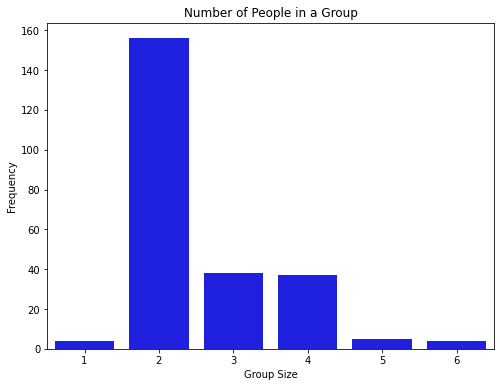

In [70]:
group_sizes = tip['size'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=group_sizes.index, y=group_sizes.values, color='blue')
plt.xlabel("Group Size")
plt.ylabel("Frequency")
plt.title("Number of People in a Group")
plt.show()


tip with respect to family size

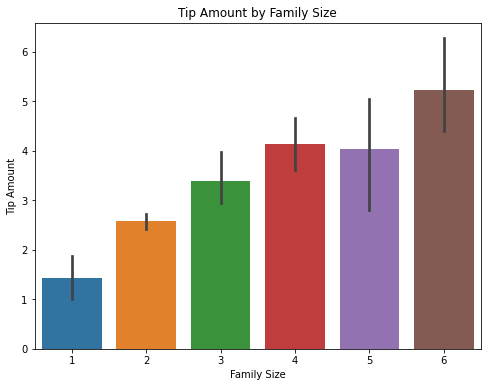

In [76]:
plt.figure(figsize=(8, 6))
sns.barplot(x="size", y="tip", data=tip)
plt.title("Tip Amount by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Tip Amount")
plt.show()


maximum profit - smoker or non smoke

In [78]:
total_bill_smokers = tip[tip['smoker'] == 'Yes']['total_bill'].sum()
total_bill_non_smokers = tip[tip['smoker'] == 'No']['total_bill'].sum()
max_profit_group = 'Smokers' if total_bill_smokers > total_bill_non_smokers else 'Non-Smokers'
print("Group with the maximum profit:", max_profit_group)


Group with the maximum profit: Non-Smokers
